# Regression Analysis: Seasonal Effects with Sklearn Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Convert yen.csv data to DataFrame:
yen_futures = pd.read_csv(
    Path("./Data/yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the DataFrame to begin on January 1st, 1990:
yen_futures = yen_futures.loc["1990-01-01":,:]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [4]:
yen_futures['Return'] = yen_futures.Settle.pct_change()*100
yen_futures['Return'] = yen_futures.Return.replace(-np.inf,np.nan)
yen_futures = yen_futures.dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509


### Lagged Returns 

In [5]:
# Create a lagged return using the shift function:
yen_futures['Lagged_Return'] = yen_futures.Return.shift()
yen_futures = yen_futures.dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


### Train Test Split

In [6]:
# Create train/test split for the data using 2018-2019 for testing and the rest for training:
train = yen_futures.loc[:'2018']
test = yen_futures.loc['2018':]

In [7]:
# Create x_train series (training set using just the independent variables), and x_test (test set of of just the independent variables):
x_train = train['Lagged_Return'].to_frame()
x_test = test['Lagged_Return'].to_frame()

# Create y_train series (training set using just the "y" variable, i.e., "Futures Return"), and y_test (test set of just the "y" variable):
y_train = train['Return']
y_test = test['Return']

In [8]:
x_train

,Lagged_Return
Date,
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
2014-02-25,0.020502
2014-02-26,0.327970
2014-02-27,-0.296251
2014-02-28,0.389344
2014-03-03,0.275566


# Linear Regression Model

In [9]:
# Create the Linear Regression model:
model = LinearRegression()

# Fit the model using the training sets (X_train, Y_train):
model.fit(x_train,y_train)

LinearRegression()

# Make predictions using the Test Data

In [10]:
# Make a prediction of "y" values using the test dataset:
prediction = model.predict(x_test)

In [16]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results = y_test.to_frame()
results['Predicted_Return'] = prediction
results

,Return,Predicted_Return
Date,,
2018-01-02,0.297285,-0.005887
2018-01-03,-0.240479,-0.006597
2018-01-04,-0.213028,-0.001325
2018-01-05,-0.353933,-0.001594
2018-01-08,0.062017,-0.000213
2018-01-09,0.388776,-0.004291
2018-01-10,1.161812,-0.007494
2018-01-11,0.233023,-0.015073
2018-01-12,0.016606,-0.005967


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B3772B9C8>,
      dtype=object)

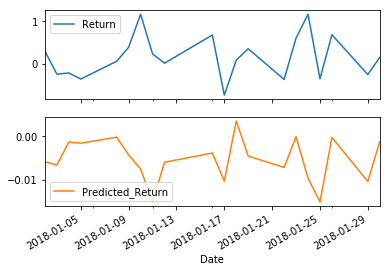

In [12]:
# Plot the first 20 predictions vs the true values (as subplots):
results[:20].plot(subplots=True)

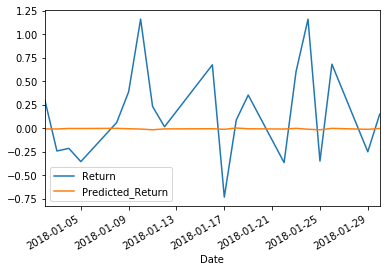

In [13]:
# Plot the first 20 predictions vs the true values (single plot - overlay the above plots):
results[:20].plot()

# Out-of-Sample Performance

In [14]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y":
mse = mean_squared_error(results['Return'],results['Predicted_Return'])

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f'Out-of-Sample Root Mean Squared Error (RMSE): {rmse}')

Out-of-Sample Root Mean Squared Error (RMSE): 0.41521675083603804


# In-Sample Performance

In [15]:
# Construct a dataframe using just the "y" training data:
in_sample_df = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_df['In_Sample_Predictions'] = model.predict(x_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample):
in_sample_mse = mean_squared_error(in_sample_df['Return'],in_sample_df['In_Sample_Predictions'])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample):
in_sample_rmse = np.sqrt(in_sample_mse)
print(f'In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}')

In-sample Root Mean Squared Error (RMSE): 0.5658708047560468


# Conclusion
The predicted returns and the actual returns are too far off to consider this a confident model.

The in-sample RMSE is higher than the out-of-sample RMSE by about 0.15 and the out-of-sample should be higher than the in-sample RMSE.

The model may either need more data or needs to be tuned to be used as a more confident predictor.